In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ds = pd.read_csv("emails.csv")
ds.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [3]:
ds.shape

(5728, 2)

In [4]:
ds.spam.value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

Text(0.5, 1.0, 'Legitimate VS Non-legitimate')

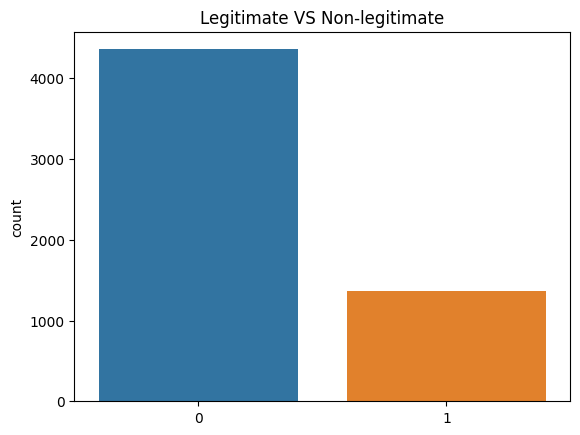

In [5]:
sns.countplot(x='spam', data=ds)
plt.xlabel('')
plt.title('Legitimate VS Non-legitimate')

In [6]:
messages = ds["text"].tolist()
output_labels = ds["spam"].values

In [7]:
import re

processed_messages = []

for message in messages:
    message = re.sub(r'\W', ' ', message)
    message = re.sub(r'\s+[a-zA-Z]\s+', ' ', message)
    message = re.sub(r'\^[a-zA-Z]\s+', ' ', message)
    message = re.sub(r'\s+', ' ', message, flags=re.I)
    message = re.sub(r'^b\s+', '', message)
    processed_messages.append(message)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_messages, output_labels, test_size=0.2, random_state=0)

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.75, stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import pickle ## importing pickle used for dumping models
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb')) ## saving to into vectorizer.pkl file

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [12]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[872  13]
 [  6 255]] 98.34205933682374


In [14]:
import pickle
pickle.dump(model, open("phishing.pkl", "wb"))

In [15]:
loaded_model = pickle.load(open("phishing.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.9834205933682374

In [16]:
from nltk.stem.porter import PorterStemmer ## stemming of words
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = vectorizer.transform(new_corpus).toarray()
  new_y_pred = loaded_model.predict(new_X_test)
  return new_y_pred
new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
  print("Phishing")
else :
  print("NOT Phishing")

Enter new review...We have some changes in our regular class schedule for this week. Instead of the usual "Machine Learning Foundations" and "Data Science Career Readiness Training" on Wednesday, 14th June, we are rescheduling the class to Thursday, 15th June.  Instructor, will be conducting an exclusive workshop titled "Machine Learning Model Deployment" on the 14th of June. The workshop will be held from 7:00 PM to 8:30 PM IST. We strongly recommend all students to attend the workshop.  You can join the workshop via this link.  Please reach out to us via Discussions for any queries. We appreciate your understanding and cooperation in this matter, and we look forward to seeing you at the workshop and the rescheduled class.
NOT Phishing


In [17]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = vectorizer.transform(new_corpus).toarray()
  new_y_pred = loaded_model.predict(new_X_test)
  return new_y_pred
new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
  print("Phishing")
else :
  print("NOT Phishing")

Enter new review..."I love tax season" said no one ever. So here are some hacks to make it more bearable: Save up to ₹46 K in taxes by investing ₹1.5 L in ELSS Mutual Funds Save up to ₹10 K in taxes by harvesting ₹1 L in long-term capital gains. Check recommendations Unfortunately, complaining about taxes is not tax deductible
Phishing
